<a href="https://colab.research.google.com/github/saurabhshinkar/Sbsdp/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing** **Libraries**

In [121]:
#Import all library that will be used in entire project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Mount Drive And Import Data**

In [122]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Seoul bike sharing demand prediction/'
data= pd.read_csv(File_path + 'SeoulBikeData.csv',encoding= 'unicode_escape')

In [124]:
# First Look 
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [125]:
#tail of data
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [127]:
#Discription of Data
data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


# **Handling Missing Vaules**

In [128]:
data.isnull().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

No null values in our data

# **Making Data In Proper Format**

In [129]:
type(data['Date'][0])

str

In [130]:
data['Date'] = pd.to_datetime(data['Date'])

In [131]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [132]:
import datetime

In [133]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month_name()
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [134]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


In [135]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday


Text(0.5, 1.0, 'Correlation Heatmap')

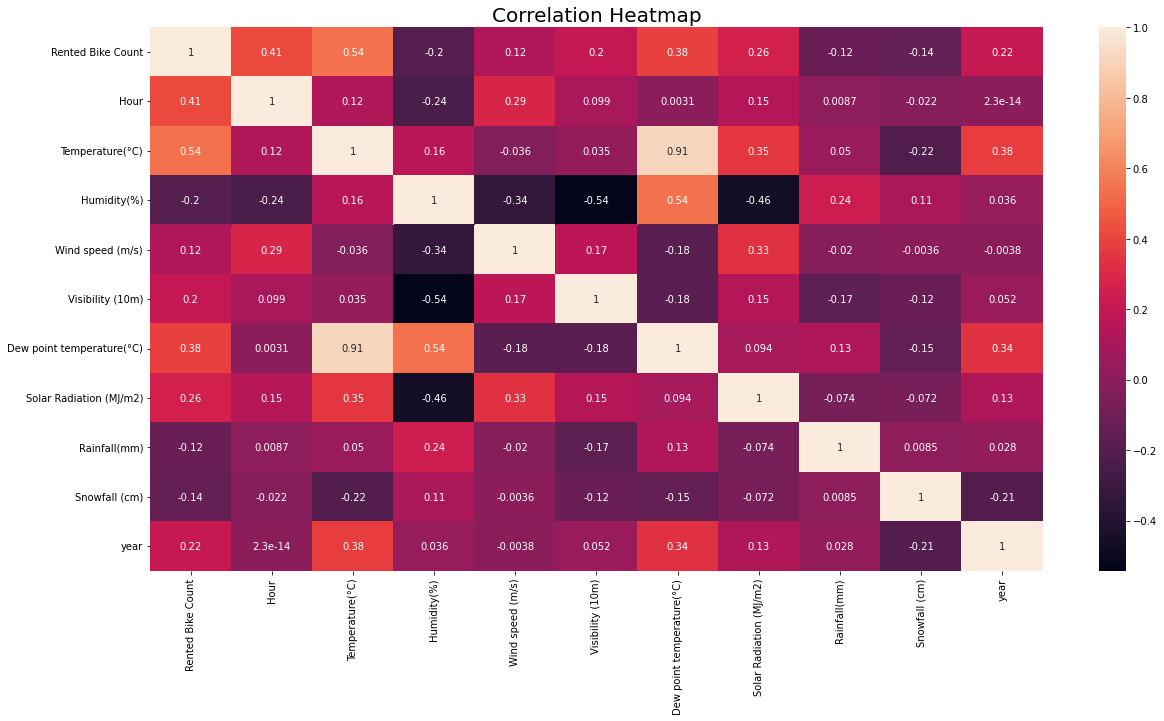

In [136]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

In [137]:
data[["Temperature(°C)","Dew point temperature(°C)"]]

,Temperature(°C),Dew point temperature(°C)
0,-5.2,-17.6
1,-5.5,-17.6
2,-6.0,-17.7
3,-6.2,-17.6
4,-6.0,-18.6
...,...,...
8755,4.2,-10.3
8756,3.4,-9.9
8757,2.6,-9.9
8758,2.1,-9.8


In [138]:
data.drop(columns=['Dew point temperature(°C)'], axis=1,inplace=True)

In [139]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [140]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [141]:
numerical 

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year']

In [142]:
numerical.remove('Date')

In [143]:
numerical

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year']

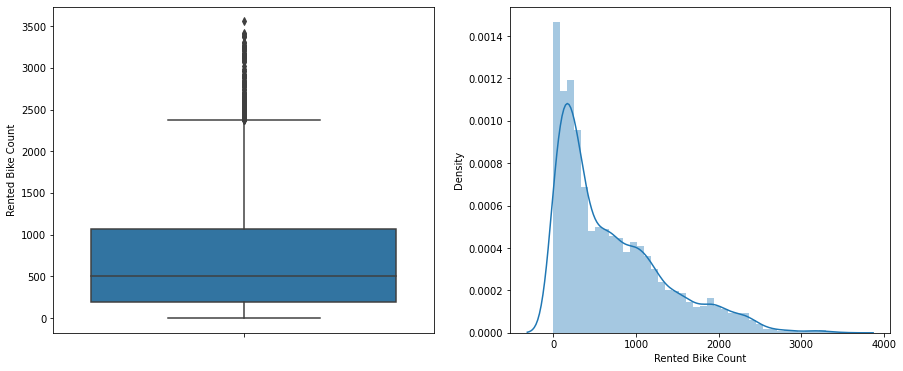

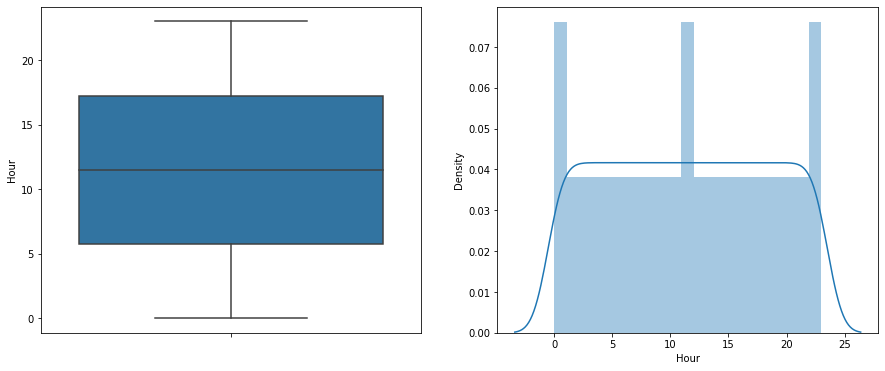

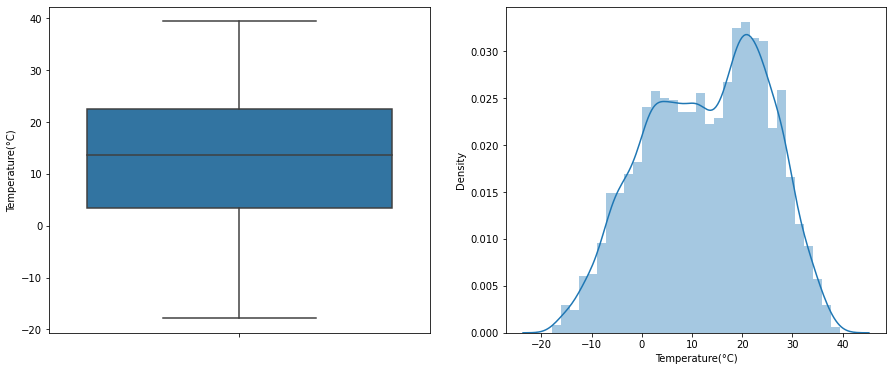

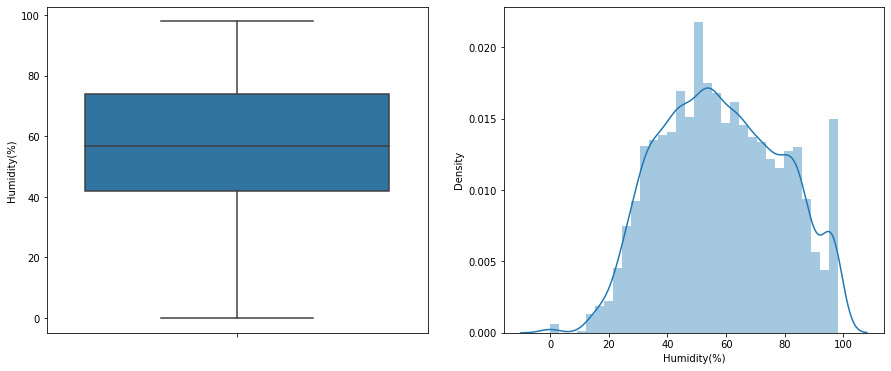

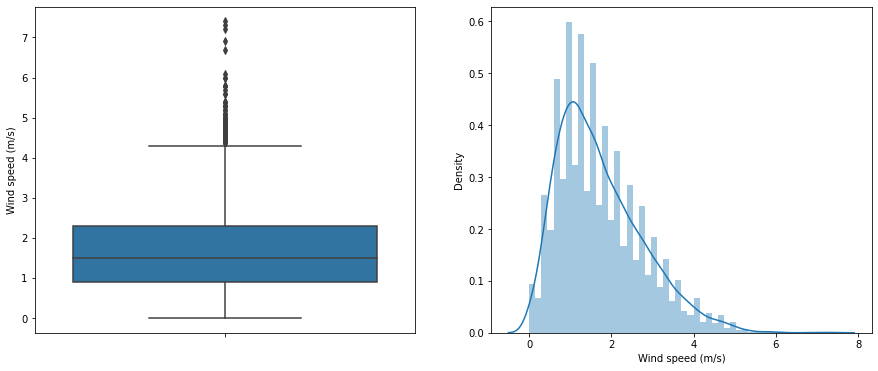

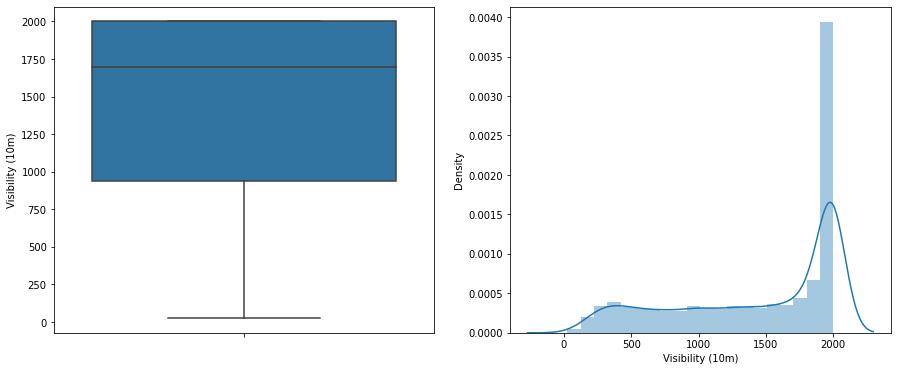

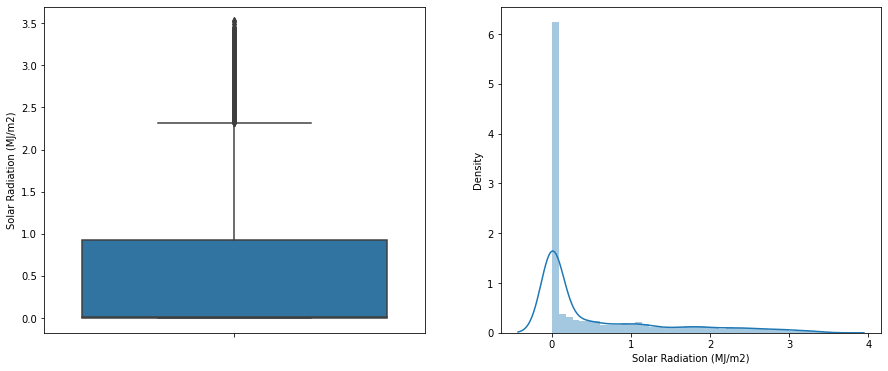

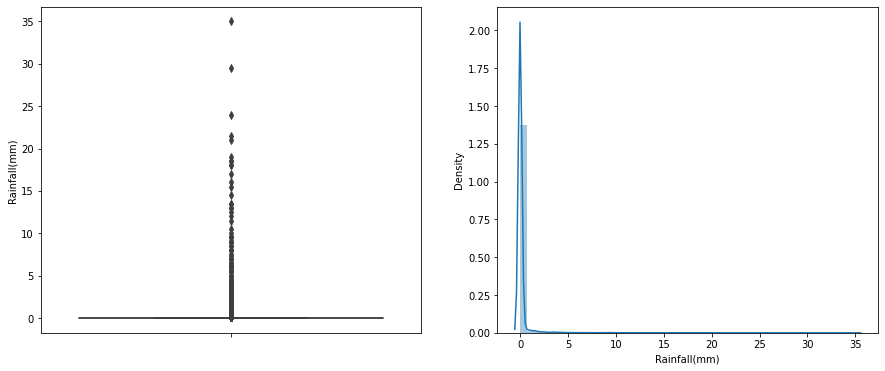

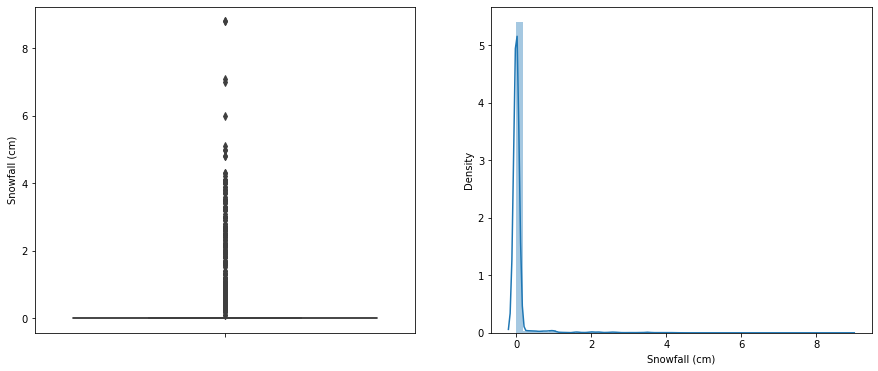

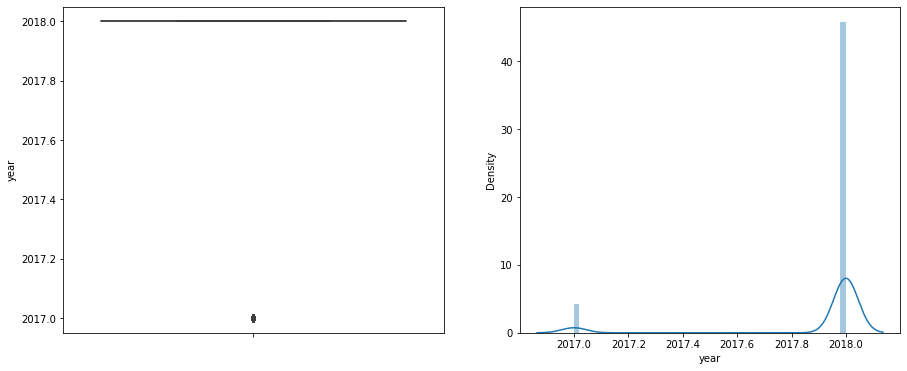

In [144]:
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

# **EDA**

In [145]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


In [146]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Seasons  contains  4  labels
Holiday  contains  2  labels
Functioning Day  contains  2  labels
month  contains  12  labels
day  contains  7  labels


Text(0.5, 1.0, 'Distribution Plot Of Rented Bike Count')

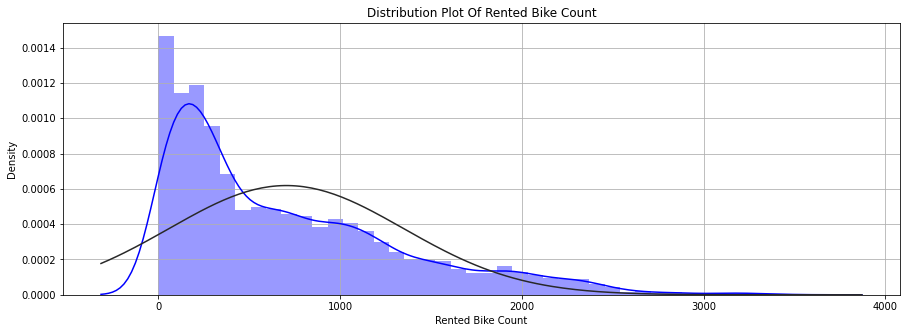

In [147]:
#Distribution Plot Of Rented Bike Count
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Rented Bike Count'],fit=norm,color="blue")
plt.grid()
plt.title('Distribution Plot Of Rented Bike Count')

In [148]:
data.groupby('Hour')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)

,Hour,Rented Bike Count
18,18,1502.926027
19,19,1195.147945
17,17,1138.509589
20,20,1068.964384
21,21,1031.449315
8,8,1015.701370
16,16,930.621918
22,22,922.797260
15,15,829.186301
14,14,758.824658


In [149]:
temp_and_rented_bike= data.groupby('Temperature(°C)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
temp_and_rented_bike

,Temperature(°C),Rented Bike Count
485,32.2,1692.875000
488,32.5,1638.000000
466,30.3,1579.750000
515,35.2,1558.333333
429,26.6,1552.650000
...,...,...
14,-15.3,63.833333
12,-15.6,60.333333
8,-16.0,46.000000
3,-16.9,36.000000


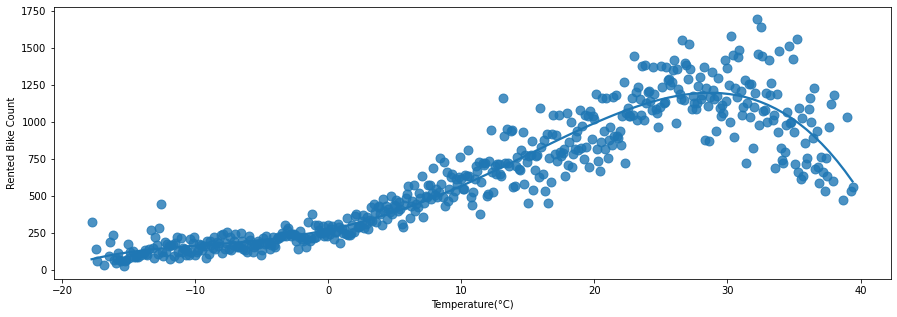

In [240]:
sns.regplot(x="Temperature(°C)", y="Rented Bike Count", data=temp_and_rented_bike,
                 scatter_kws={"s": 80},
                 order=4, ci=None)

Text(0.5, 0, 'Temperature')

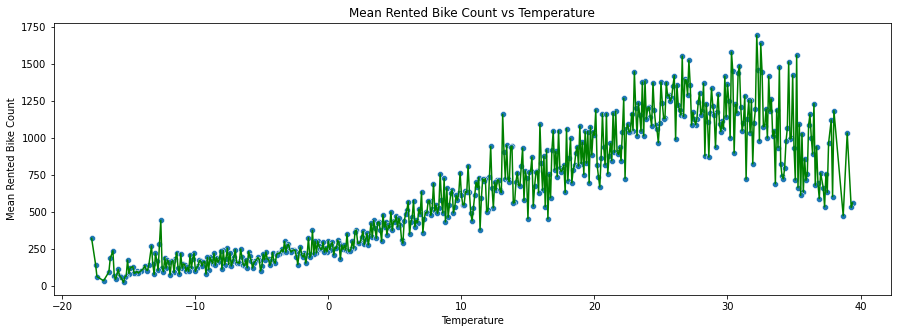

In [238]:
#visualizing
sns.scatterplot(x="Temperature(°C)", y="Rented Bike Count", data=temp_and_rented_bike)
sns.lineplot(x="Temperature(°C)", y="Rented Bike Count", data=temp_and_rented_bike, color='g')
plt.title('Mean Rented Bike Count vs Temperature')
plt.ylabel('Mean Rented Bike Count')
plt.xlabel('Temperature')

<Figure size 3600x3600 with 0 Axes>

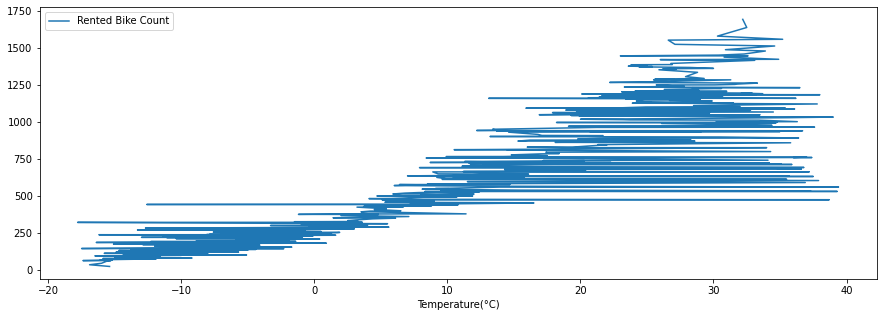

In [150]:
plt.figure(figsize = (50,50))
temp_and_rented_bike.plot(x="Temperature(°C)",y="Rented Bike Count")

In [151]:
humidity_and_rented_bike= data.groupby('Humidity(%)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
humidity_and_rented_bike

,Humidity(%),Rented Bike Count
3,12,2032.000000
2,11,1986.000000
4,13,1451.000000
1,10,1315.000000
39,48,965.284553
...,...,...
83,92,177.851852
89,98,172.320000
87,96,170.828829
88,97,166.069364


AttributeError: ignored

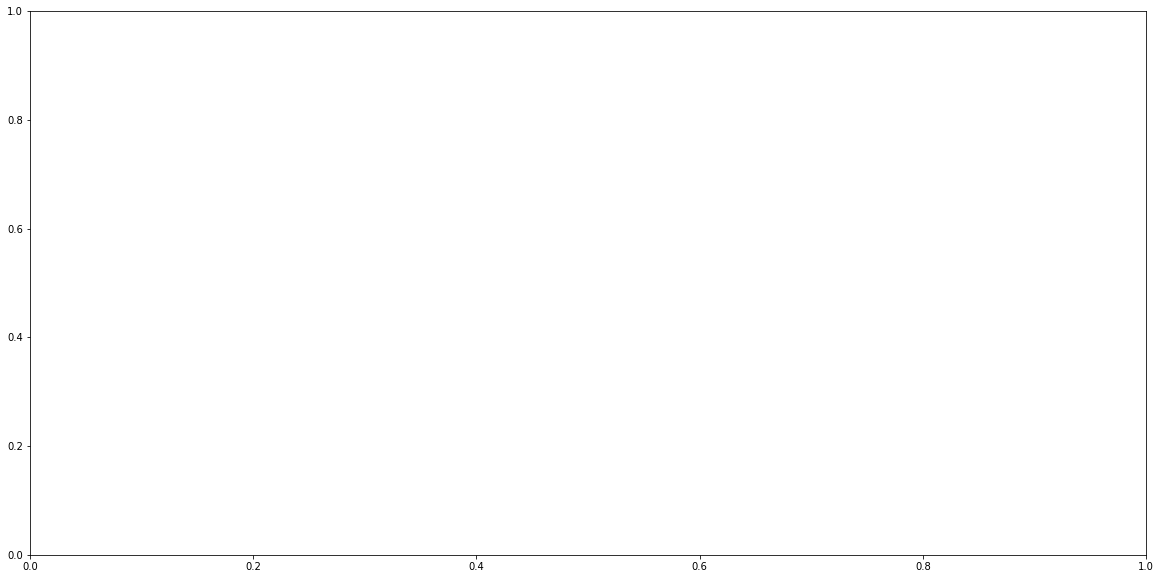

In [237]:
#mean ranted bike coungt by Humidity
plt.figure(figsize = (20,10))
sns.barplot(x="Humidity(%)", y="Rented Bike Count", data=humidity_and_rented_bike)
plt.title("Mean Rented Bike Count By Humidity",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

In [153]:
Wind_speed_and_rented_bike= data.groupby('Wind speed (m/s)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
Wind_speed_and_rented_bike

,Wind speed (m/s),Rented Bike Count
62,7.2,1805.000000
56,5.7,1176.000000
31,3.1,984.459677
28,2.8,928.056604
64,7.4,913.000000
...,...,...
52,5.2,300.500000
58,6.0,257.500000
60,6.7,146.000000
63,7.3,133.000000


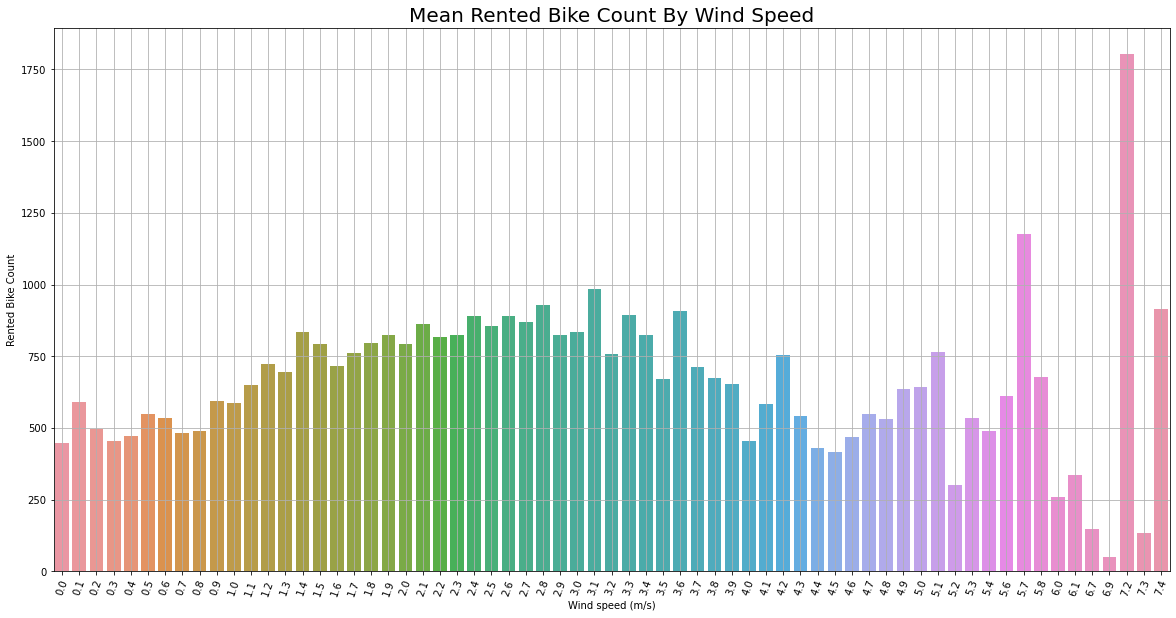

In [154]:
#mean ranted bike coungt by wind speed
plt.figure(figsize = (20,10))
sns.barplot(x="Wind speed (m/s)", y="Rented Bike Count", data=Wind_speed_and_rented_bike)
plt.title("Mean Rented Bike Count By Wind Speed",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

In [155]:
rainfall_and_rented_bike= data.groupby('Rainfall(mm)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
rainfall_and_rented_bike

,Rainfall(mm),Rented Bike Count
12,1.3,764.000000
0,0.0,739.311103
57,21.5,596.000000
8,0.9,489.333333
35,7.3,468.000000
...,...,...
45,12.0,13.000000
51,16.0,11.000000
53,18.0,10.500000
50,15.5,10.000000


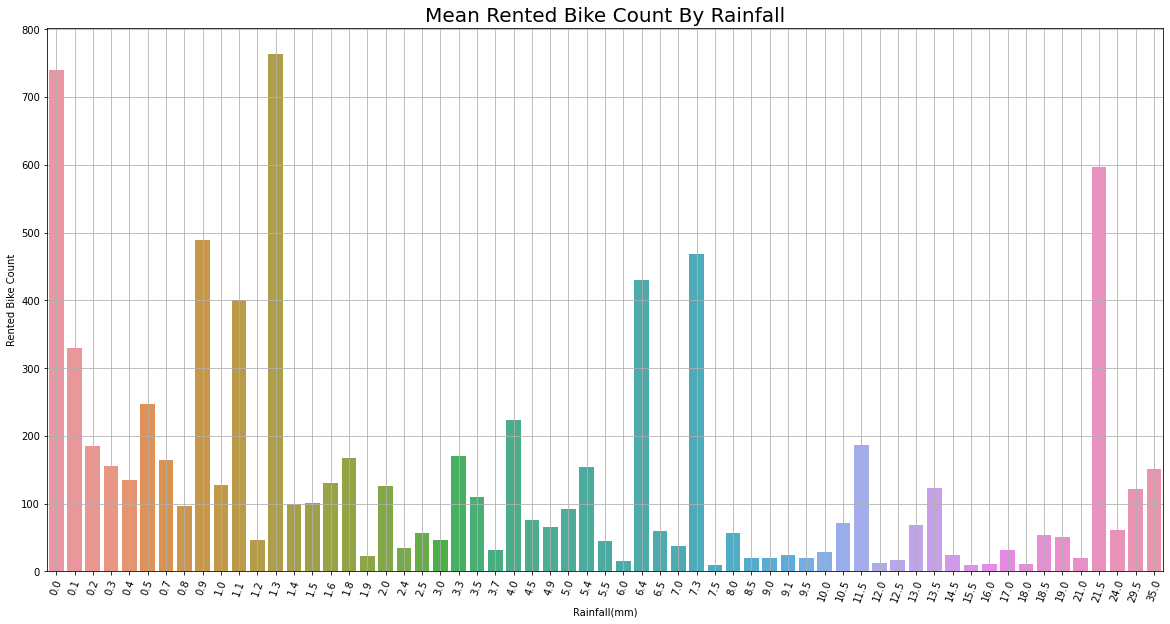

In [156]:
#mean ranted bike coungt by rainfall
plt.figure(figsize = (20,10))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=rainfall_and_rented_bike)
plt.title("Mean Rented Bike Count By Rainfall",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

In [157]:
snowfall_and_rented_bike= data.groupby('Snowfall (cm)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
snowfall_and_rented_bike

,Snowfall (cm),Rented Bike Count
0,0.0,732.272935
36,3.6,436.000000
11,1.1,366.000000
29,2.9,327.500000
18,1.8,310.200000
23,2.3,299.000000
4,0.4,284.809524
33,3.3,280.333333
13,1.3,273.000000
24,2.4,264.000000


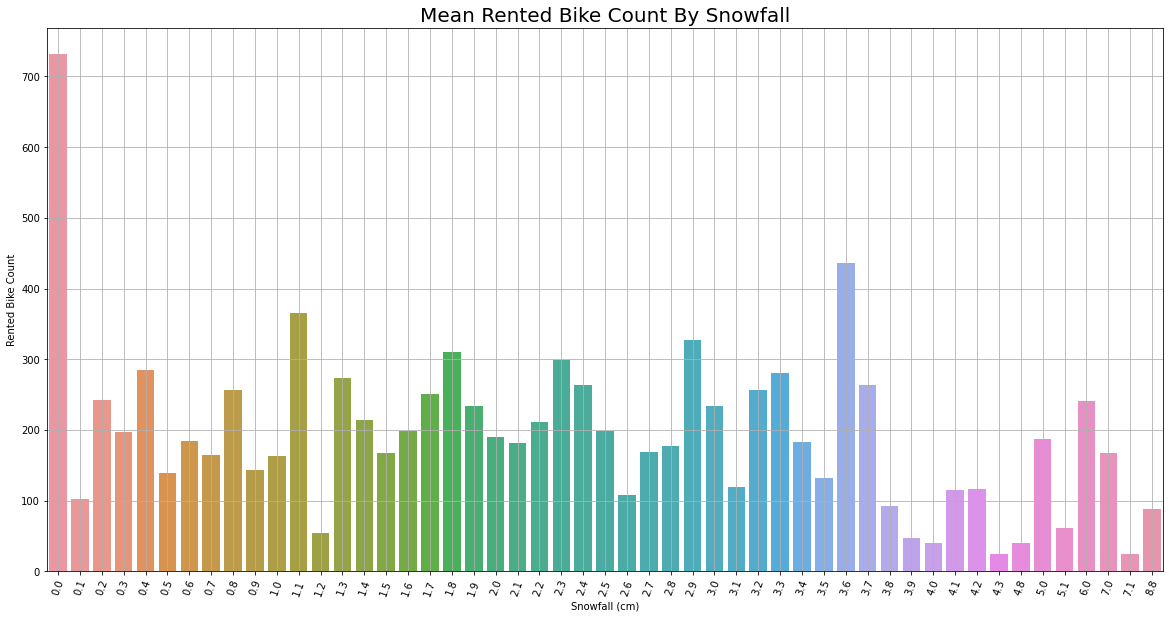

In [158]:
#mean ranted bike coungt by snowfall
plt.figure(figsize = (20,10))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=snowfall_and_rented_bike)
plt.title("Mean Rented Bike Count By Snowfall",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

In [159]:
seasons_and_rented_bike= data.groupby('Seasons')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
seasons_and_rented_bike

,Seasons,Rented Bike Count
2,Summer,1034.073370
0,Autumn,819.597985
1,Spring,730.031250
3,Winter,225.541204


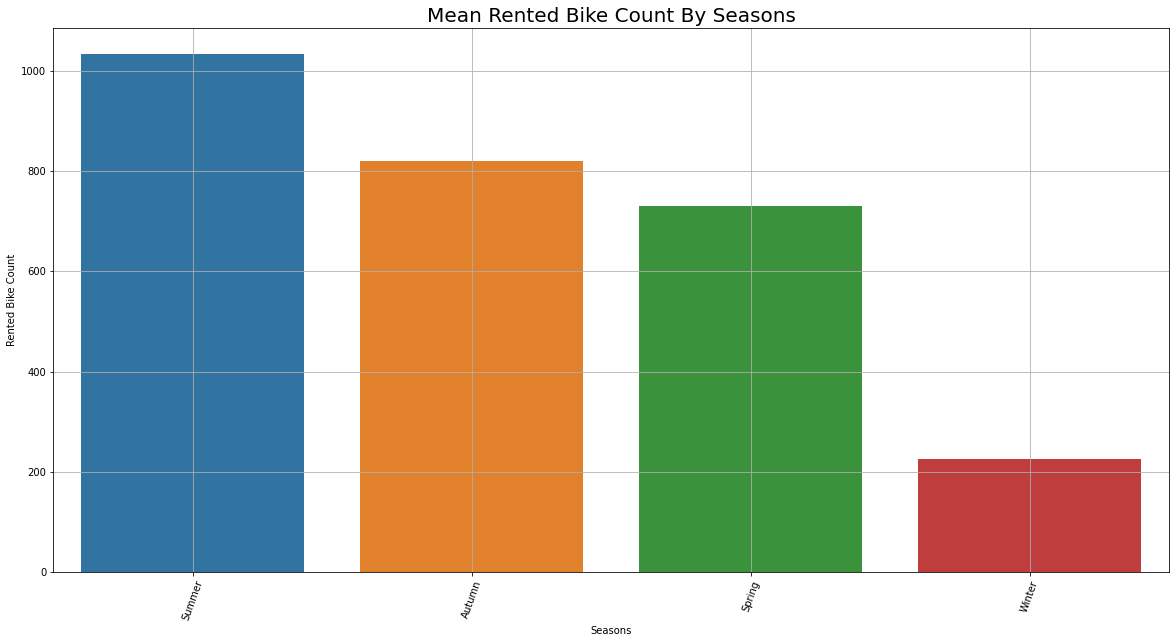

In [160]:
#mean ranted bike coungt by snowfall
plt.figure(figsize = (20,10))
sns.barplot(x="Seasons", y="Rented Bike Count", data=seasons_and_rented_bike)
plt.title("Mean Rented Bike Count By Seasons",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

In [161]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

In [162]:
holiday_and_rented_bike= data.groupby('Holiday')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
holiday_and_rented_bike

,Holiday,Rented Bike Count
1,No Holiday,715.228026
0,Holiday,499.756944


In [163]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [164]:
Functioning_Day_and_rented_bike= data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
Functioning_Day_and_rented_bike

,Functioning Day,Rented Bike Count
1,Yes,729.156999
0,No,0.000000


In [165]:
year_and_rented_bike= data.groupby('year')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
year_and_rented_bike

,year,Rented Bike Count
1,2018,746.879242
0,2017,249.099462


In [166]:
month_and_rented_bike= data.groupby('month')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
month_and_rented_bike

,month,Rented Bike Count
6,June,981.566667
5,July,929.219086
8,May,895.091398
10,October,842.725806
1,August,825.524194
0,April,772.526389
11,September,693.508333
9,November,685.294444
7,March,611.608871
2,December,419.047043


In [167]:
day_and_rented_bike= data.groupby('day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
day_and_rented_bike

,day,Rented Bike Count
4,Thursday,743.803686
0,Friday,734.449346
2,Saturday,730.348558
1,Monday,719.635833
6,Wednesday,714.521226
5,Tuesday,678.362421
3,Sunday,615.968364


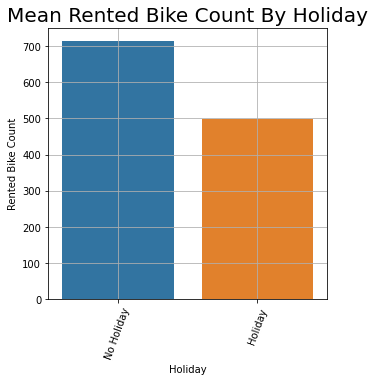

In [168]:
#mean ranted bike count by holidays
plt.figure(figsize = (5,5))
sns.barplot(x="Holiday", y="Rented Bike Count", data=holiday_and_rented_bike)
plt.title("Mean Rented Bike Count By Holiday",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

# ***Final Df***

In [169]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 

In [170]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons','Holiday','Functioning Day','year','month','day']]).toarray())

encoder_df.columns = encoder.get_feature_names(['Seasons','Holiday','Functioning Day','year','month','day'])

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)


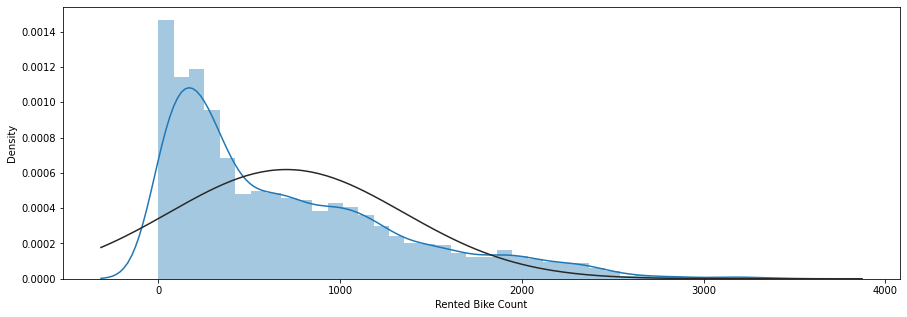

<Figure size 1080x360 with 0 Axes>

In [171]:
# Target Variable Transformation
sns.distplot(final_df['Rented Bike Count'], fit=norm);
fig = plt.figure()

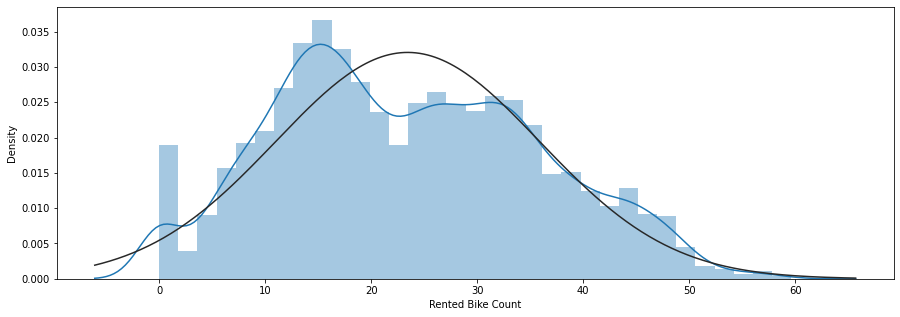

<Figure size 1080x360 with 0 Axes>

In [172]:
# It looks more normal now.
sns.distplot(np.sqrt(final_df['Rented Bike Count']), fit=norm);
fig = plt.figure()

In [173]:
final_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'year', 'month', 'day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'year_2017', 'year_2018', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [174]:
final_df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [175]:
Y =np.sqrt(final_df['Rented Bike Count'])

In [176]:
final_df.drop(columns=['Rented Bike Count','Date','year','month','day'], axis=1,inplace=True)

In [177]:
final_df.drop(columns=['Seasons','Holiday','Functioning Day'], axis=1,inplace=True)

In [178]:
final_df.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes', 'year_2017', 'year_2018',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [179]:
X=final_df

# **Linear Regression**

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math


In [181]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [182]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [184]:
regressor.intercept_

-102520444180419.03

In [185]:
regressor.coef_

array([ 1.10346279e+01,  2.97723946e+01, -1.48386086e+01,  7.09373545e-01,
        1.67971463e+00, -3.11574641e+00, -5.38233806e+01, -3.53716418e-02,
        3.36893748e+14,  3.36893748e+14,  3.36893748e+14,  3.36893748e+14,
        2.09338342e+14,  2.09338342e+14,  5.69583580e+13,  5.69583580e+13,
       -2.05934417e+14, -2.05934417e+14, -5.15073021e+13, -5.15073021e+13,
       -5.15073021e+13, -5.15073021e+13, -5.15073021e+13, -5.15073021e+13,
       -5.15073021e+13, -5.15073021e+13, -5.15073021e+13, -5.15073021e+13,
       -5.15073021e+13, -5.15073021e+13, -2.43228286e+14, -2.43228286e+14,
       -2.43228286e+14, -2.43228286e+14, -2.43228286e+14, -2.43228286e+14,
       -2.43228286e+14])

In [186]:
regressor.score(X_train, y_train)

0.6654511607517628

In [187]:
y_pred_train = regressor.predict(X_train)

In [188]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [189]:
y_pred 

array([19.90625, 25.03125, 21.34375, ..., 14.8125 , 34.28125, 22.40625])

In [190]:
# Actual profits on test data
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
3152     0.000000
5867    23.388031
3456    14.594520
7750    36.482873
7728    27.982137
Name: Rented Bike Count, Length: 1752, dtype: float64

In [191]:
mean_squared_error(y_test, y_pred)

53.377437083669705

In [192]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.1855387439881895

In [193]:
r2_score(y_train, y_pred_train)

0.6654511607517628

In [194]:
r2_score(y_test, y_pred)

0.6610660635389255

In [195]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.6537495199863819


**As there is no overfitting hence no need to use lasso,ridge or elastic net method to regularize size of coefficients**

# **Decision Tree**

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [198]:
TreeRegressor= DecisionTreeRegressor(criterion='mse', random_state=0)
TreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [199]:
train_preds_tree=  TreeRegressor.predict(X_train)
test_preds_tree = TreeRegressor.predict(X_test)

In [200]:
R2_Score_for_train= r2_score(y_train, train_preds_tree)

In [201]:
R2_Score_for_train

1.0

In [202]:
R2_Score_for_test = r2_score(y_test, test_preds_tree)

In [203]:
R2_Score_for_test

0.8301089682610303

In [204]:
features = X_train.columns
importances = TreeRegressor.feature_importances_
indices = np.argsort(importances)

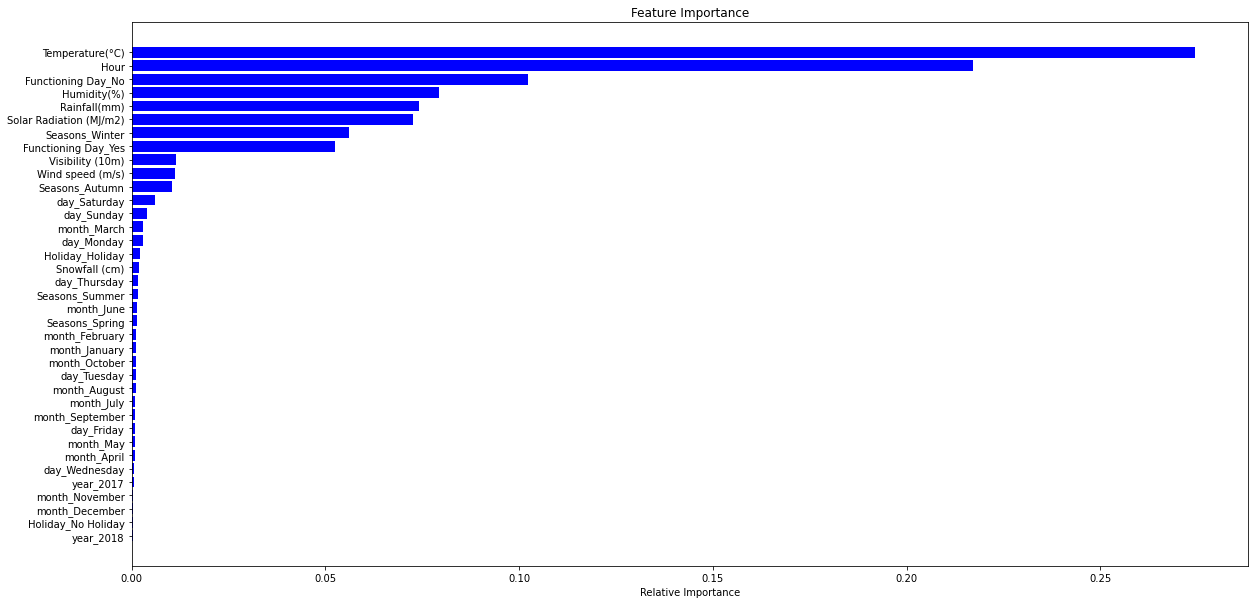

In [205]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Decision Tree Using Grid Search CV**

In [206]:
grid_values = {'max_depth':[3, 5, 7]}
TreeRegressorr= GridSearchCV(TreeRegressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
TreeRegressorr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', random_state=0),
             param_grid={'max_depth': [3, 5, 7]})

In [207]:
TreeRegressorr.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [208]:
print("Model Accuracy: %.3f" % TreeRegressorr.score(X_train, y_train))

Model Accuracy: 0.852


# **Random Forest**

In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [210]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


Regressor = RandomForestRegressor() 

# Fit the object to train dataset
Regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [211]:
train_preds =  Regressor.predict(X_train)
test_preds  = Regressor.predict(X_test)

In [212]:
R2_Score_for_train= r2_score(Y_train, train_preds)

In [213]:
R2_Score_for_train

0.9888666021697856

In [214]:
R2_Score_for_test= r2_score(Y_test, test_preds)

In [215]:
R2_Score_for_test

0.918030714713647

In [216]:
features = X_train.columns
importances = Regressor.feature_importances_
indices = np.argsort(importances)

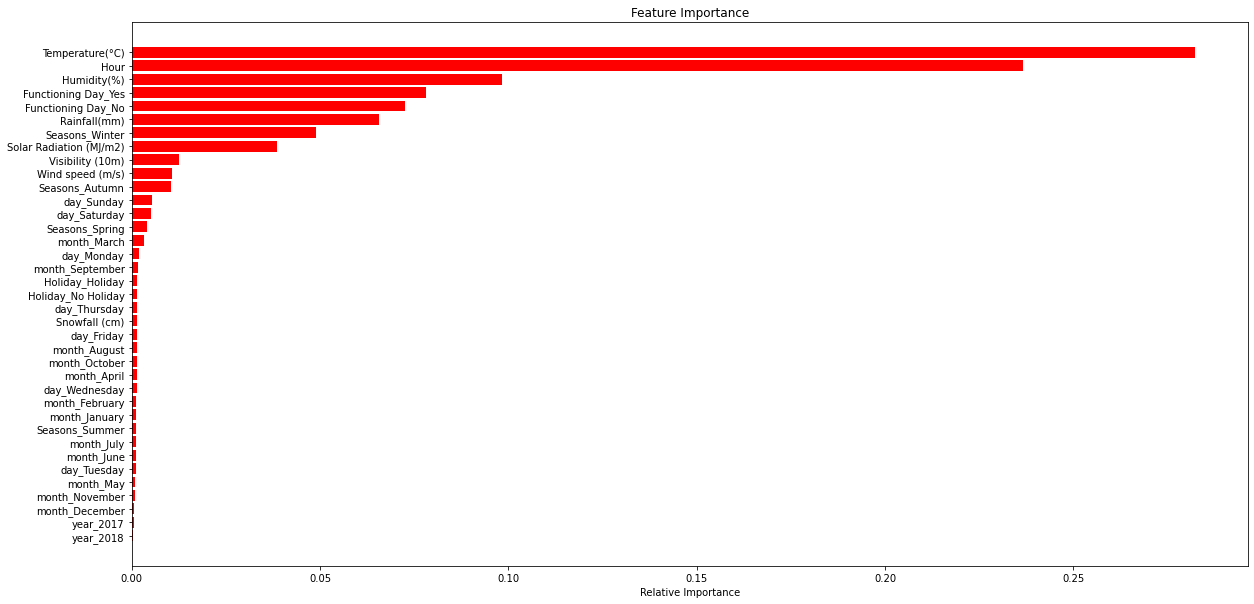

In [217]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Random Forest Using Grid Search CV**

In [218]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
Regressorr= GridSearchCV(Regressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
Regressorr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [219]:
print("Model Accuracy: %.3f" % Regressorr.score(X_train, Y_train))

Model Accuracy: 0.873


In [220]:
print("Model Accuracy: %.3f" % Regressorr.score(X_test, Y_test))

Model Accuracy: 0.852


# **Gradient Boosting**

In [221]:

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
#

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.877
The mean squared error (MSE) on test set: 19.3636


**Gradient Boosting using Grid Search CV**

In [222]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbrr = GridSearchCV(gbr, param_grid = grid_values, cv=5)

# Fit the object to train dataset
gbrr.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01, loss='ls',
                                                 min_samples_split=5,
                                                 n_estimators=1000),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [223]:
print("Model Accuracy: %.3f" % gbrr.score(X_train_std, y_train))

Model Accuracy: 0.758


In [224]:
print("Model Accuracy: %.3f" % gbrr.score(X_test_std, y_test))

Model Accuracy: 0.740


# **XG Boost**

In [225]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 

 
# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
 
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', seed = 123)

 
# Fitting the model
xgb_r.fit(X_train, Y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

[13:05:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  4.356484


In [226]:
print("Model Accuracy: %.3f" % xgb_r.score(X_train, Y_train))

Model Accuracy: 0.892


In [227]:
print("Model Accuracy: %.3f" % xgb_r.score(X_test, Y_test))

Model Accuracy: 0.879


**XG Boost Using Grid Search CV**

In [228]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
xgb_rr = GridSearchCV(xgb_r, param_grid = grid_values, cv=5)

# Fit the object to train dataset
xgb_rr.fit(X_train, Y_train)

[13:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(seed=123),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [229]:
print("Model Accuracy: %.3f" % xgb_rr.score(X_train, Y_train))

Model Accuracy: 0.969


In [230]:
print("Model Accuracy: %.3f" % xgb_rr.score(X_test, Y_test))

Model Accuracy: 0.926


In [231]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

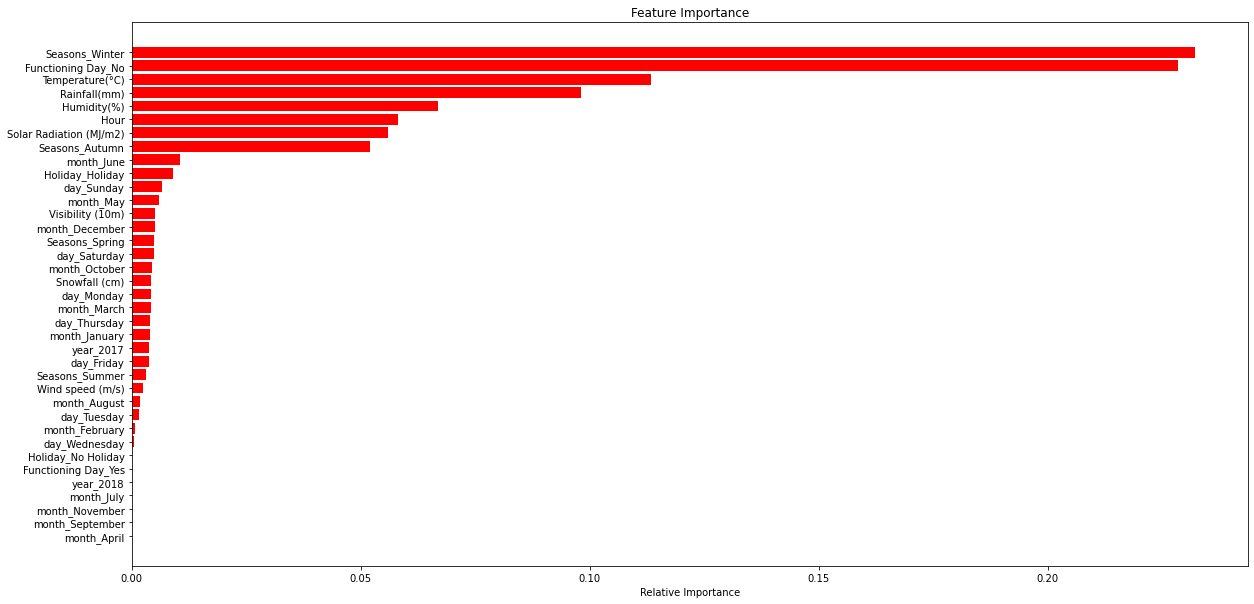

In [232]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()